# Time Series Analysis of Shortwave Upward Flux

Import

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
mpl.rcParams['figure.dpi'] = 300

import numpy as np
import xarray as xr
import pandas as pd
import math
import random
import statistics 
from statistics import mode
from statsmodels.tsa.tsatools import detrend

NetCDF/HDF files

In [2]:
aqua_folder = "C:/Users/cenwe/Downloads/Programming/Python/simulated_Earth/Water/"
land_folder = "C:/Users/cenwe/Downloads/Programming/Python/simulated_Earth/Land/"
earthlike_folder = "C:/Users/cenwe/Downloads/Programming/Python/simulated_Earth/Earthlike/"

a_data1 = xr.open_dataset(aqua_folder + "a_jan.nc")
a_data2 = xr.open_dataset(aqua_folder + "a_feb.nc")
a_data3 = xr.open_dataset(aqua_folder + "a_mar.nc")
a_data4 = xr.open_dataset(aqua_folder + "a_apr.nc")
a_data5 = xr.open_dataset(aqua_folder + "a_may.nc")
a_data6 = xr.open_dataset(aqua_folder + "a_jun.nc")
a_data7 = xr.open_dataset(aqua_folder + "a_jul.nc")

l_data1 = xr.open_dataset(land_folder + "l_jan.nc")
l_data2 = xr.open_dataset(land_folder + "l_feb.nc")
l_data3 = xr.open_dataset(land_folder + "l_mar.nc")
l_data4 = xr.open_dataset(land_folder + "l_apr.nc")
l_data5 = xr.open_dataset(land_folder + "l_may.nc")
l_data6 = xr.open_dataset(land_folder + "l_jun.nc")
l_data7 = xr.open_dataset(land_folder + "l_jul.nc")

e_data1 = xr.open_dataset(earthlike_folder + "e_jan.nc")
e_data2 = xr.open_dataset(earthlike_folder + "e_feb.nc")
e_data3 = xr.open_dataset(earthlike_folder + "e_mar.nc")
e_data4 = xr.open_dataset(earthlike_folder + "e_apr.nc")
e_data5 = xr.open_dataset(earthlike_folder + "e_may.nc")
e_data6 = xr.open_dataset(earthlike_folder + "e_jun.nc")
e_data7 = xr.open_dataset(earthlike_folder + "e_jul.nc")

e_data3_1 = xr.open_dataset(earthlike_folder + "e_jan3.nc")
e_data3_2 = xr.open_dataset(earthlike_folder + "e_feb3.nc")
e_data3_3 = xr.open_dataset(earthlike_folder + "e_mar3.nc")
e_data3_4 = xr.open_dataset(earthlike_folder + "e_apr3.nc")
e_data3_5 = xr.open_dataset(earthlike_folder + "e_may3.nc")
e_data3_6 = xr.open_dataset(earthlike_folder + "e_jun3.nc")
e_data3_7 = xr.open_dataset(earthlike_folder + "e_jul3.nc")

In [3]:
vi_Folder = "C:/Users/cenwe/Downloads/Programming/Python/vegetation_index/"
vi_list = []

for y in range(1, 9):
    for x in range(1, 10):
        vi_list.append(xr.open_dataset(vi_Folder + "MODVI.200" + str(x) + "0" + str(y) + ".005.hdf").NDVI)
    for x in range(10, 15):
        vi_list.append(xr.open_dataset(vi_Folder + "MODVI.20" + str(x) + "0" + str(y) + ".005.hdf").NDVI)

## Graph

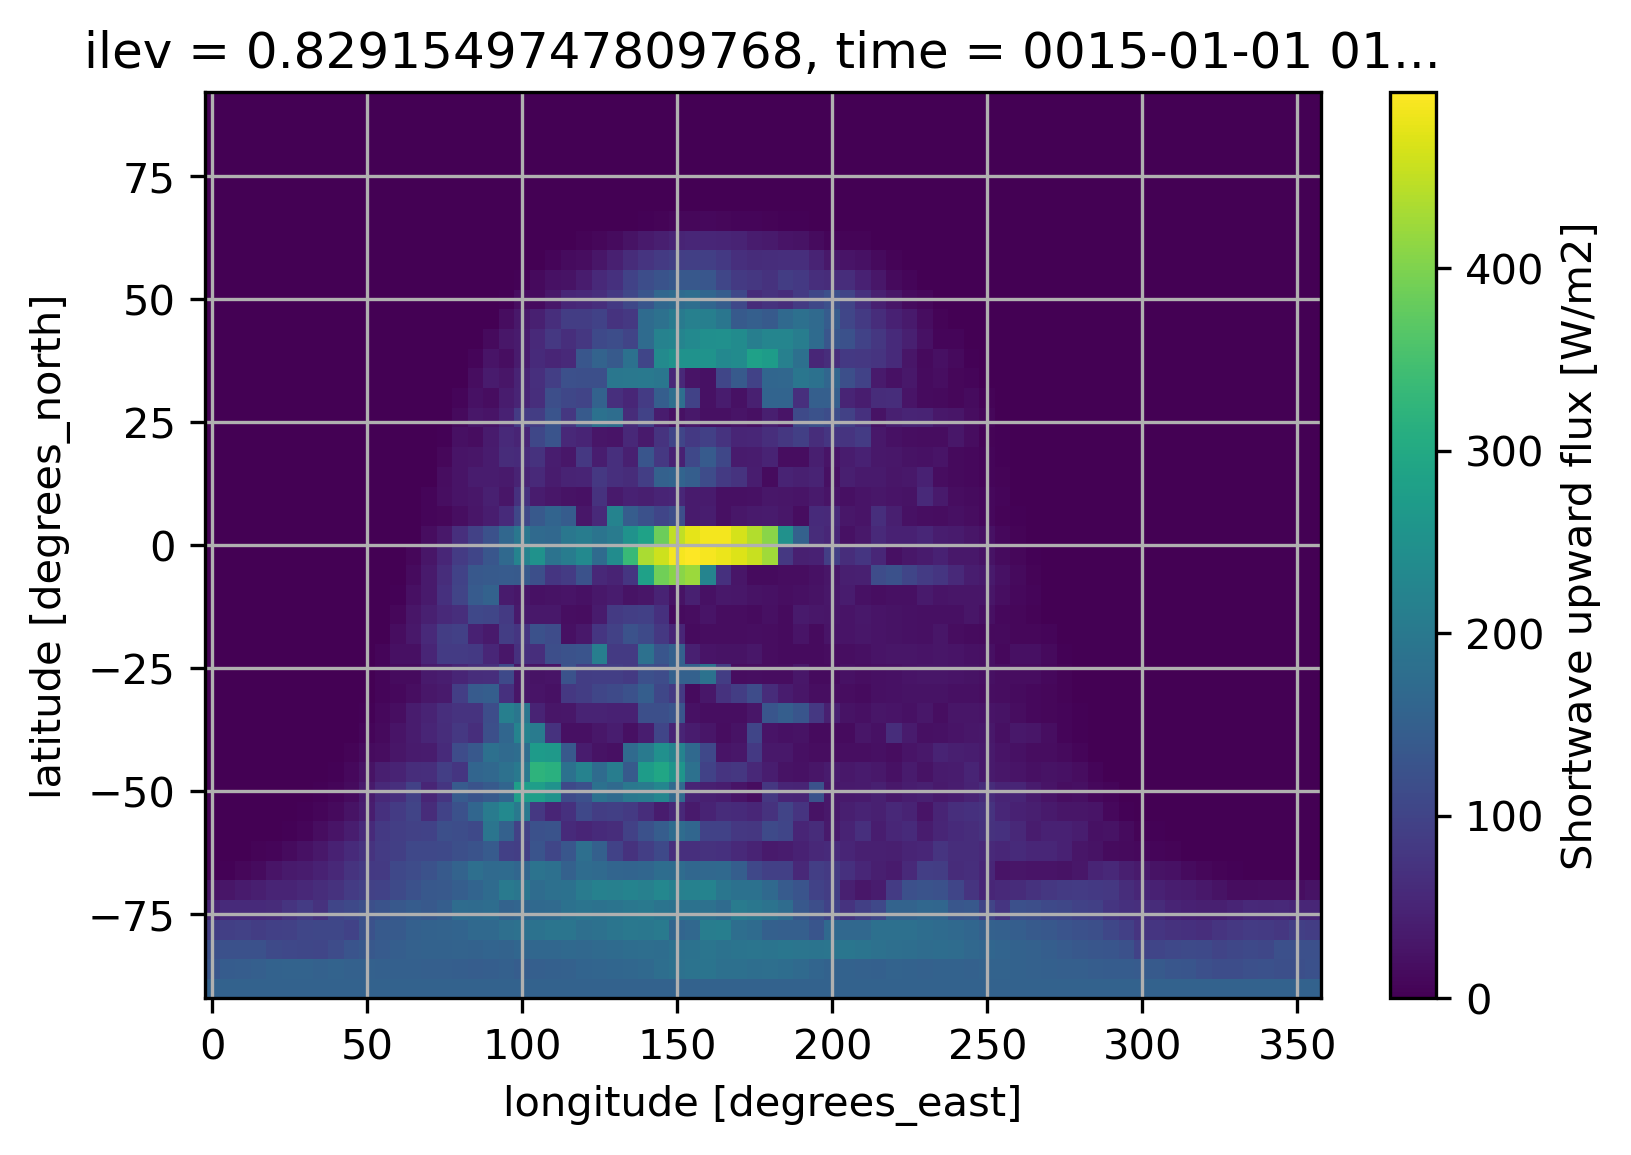

In [5]:
FUSGraph = e_data1.FUS.isel(time = 0, ilev = 0)
FUSGraph.plot()
plt.grid(True)

---
### Earthlike Flux

In [6]:
def appendAll(inputArray, inputList):
    for t in range(len(inputList)):
        inputArray.append(inputList.isel(time = t).mean())
    return inputArray

In [7]:
e_annualArrayFUS = []
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data1.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data2.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data3.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data4.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data5.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data6.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data7.FUS)

e_annualArrayFUL = []
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data1.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data2.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data3.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data4.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data5.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data6.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data7.FUL)

e_annualArrayFUS3 = []
e_annualArrayFUS3 = appendAll(e_annualArrayFUS3, e_data3_1.FUS)
e_annualArrayFUS3 = appendAll(e_annualArrayFUS3, e_data3_2.FUS)
e_annualArrayFUS3 = appendAll(e_annualArrayFUS3, e_data3_3.FUS)
e_annualArrayFUS3 = appendAll(e_annualArrayFUS3, e_data3_4.FUS)
e_annualArrayFUS3 = appendAll(e_annualArrayFUS3, e_data3_5.FUS)
e_annualArrayFUS3 = appendAll(e_annualArrayFUS3, e_data3_6.FUS)
e_annualArrayFUS3 = appendAll(e_annualArrayFUS3, e_data3_7.FUS)

e_annualArrayFUL3 = []
e_annualArrayFUL3 = appendAll(e_annualArrayFUL3, e_data3_1.FUL)
e_annualArrayFUL3 = appendAll(e_annualArrayFUL3, e_data3_2.FUL)
e_annualArrayFUL3 = appendAll(e_annualArrayFUL3, e_data3_3.FUL)
e_annualArrayFUL3 = appendAll(e_annualArrayFUL3, e_data3_4.FUL)
e_annualArrayFUL3 = appendAll(e_annualArrayFUL3, e_data3_5.FUL)
e_annualArrayFUL3 = appendAll(e_annualArrayFUL3, e_data3_6.FUL)
e_annualArrayFUL3 = appendAll(e_annualArrayFUL3, e_data3_7.FUL)

monthlyVIArray = []
tempSum = 0
for x in range(112):
    tempSum += vi_list[x].where(vi_list[x] >= 0).mean()
    if x % 14 == 0 and x != 0:
        monthlyVIArray.append(tempSum/14)
        tempSum = 0

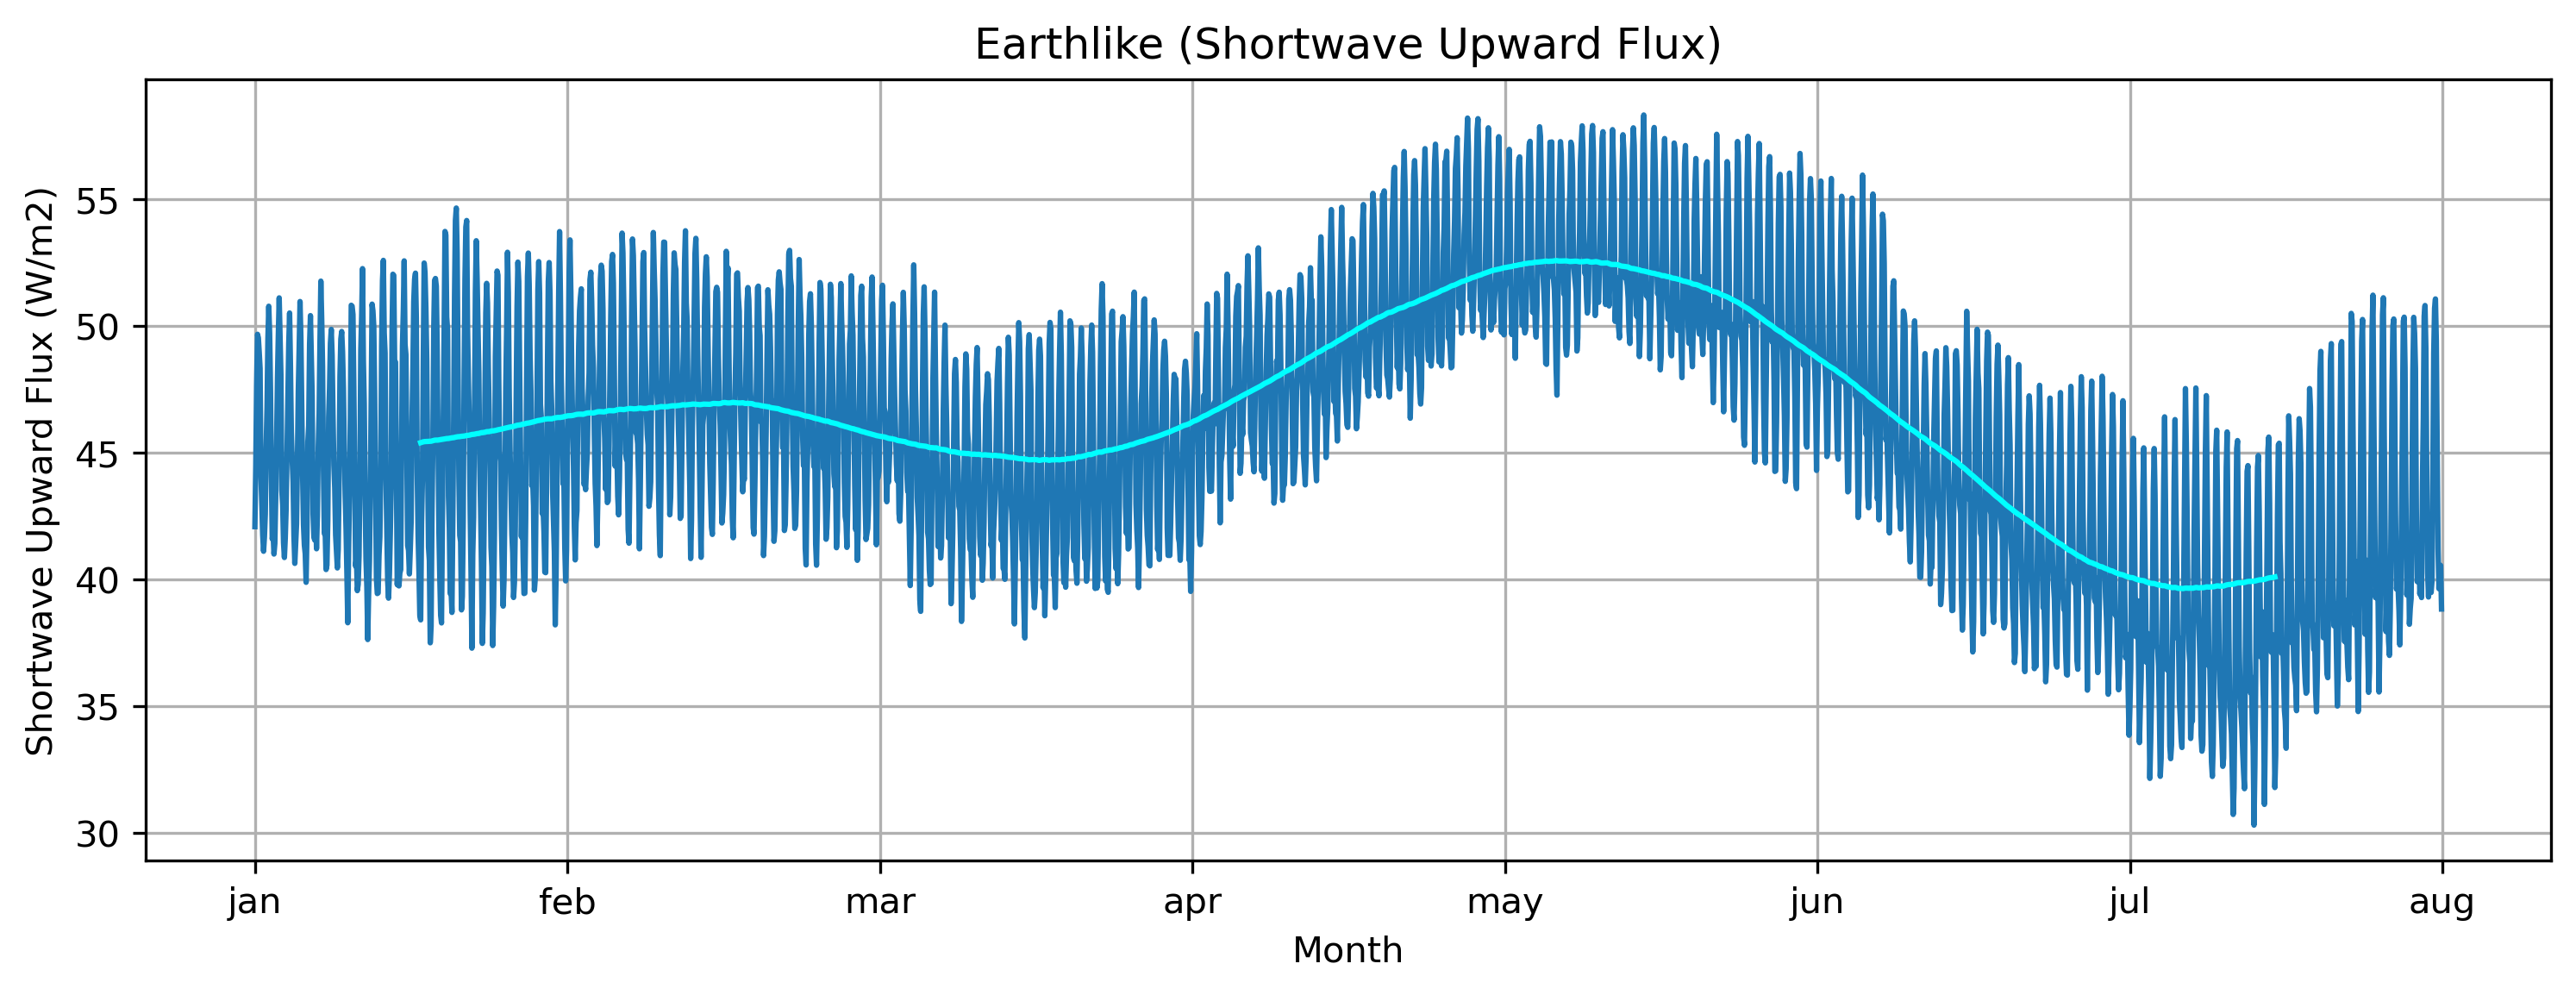

In [8]:
plt.figure(figsize=(12,4))
plt.title('Earthlike (Shortwave Upward Flux)')
plt.ylabel('Shortwave Upward Flux (W/m2)')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(np.arange(0, 2880, 360), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug']);
#Get moving average
FUSdf = pd.DataFrame(e_annualArrayFUS)
movingMean = FUSdf.rolling(384).mean()
movingMean = movingMean.shift(-192)
shiftedmm = movingMean.shift(-192)
plt.plot(e_annualArrayFUS);
plt.plot(movingMean, color='cyan');
#plt.plot(shiftedmm, linewidth=2);

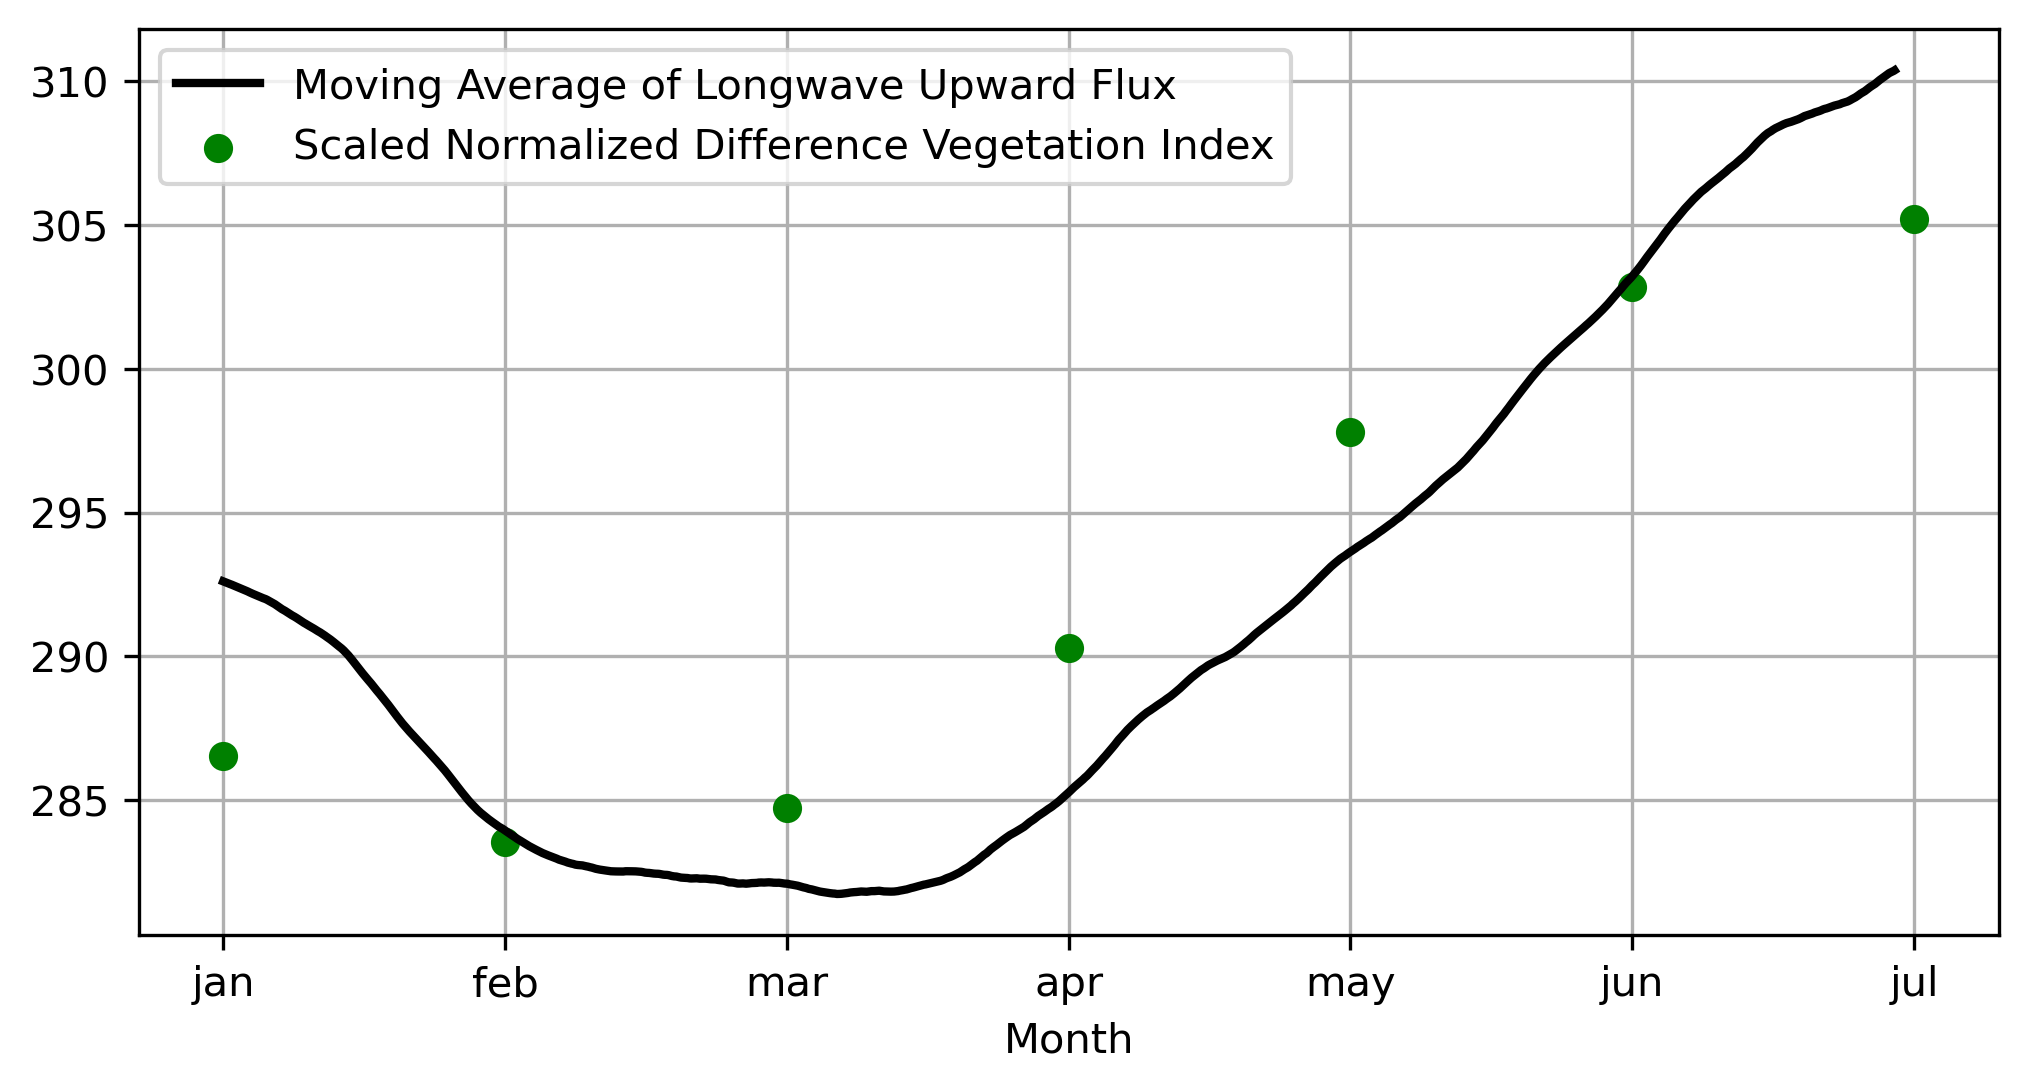

In [9]:
x = np.arange(0, 2520, 360)
z = [350.35324, 326.22912, 335.76347, 380.31974, 440.48307, 480.82224, 499.70307]
zMean = sum(z)/len(z)
y = []
for i in z:
    y.append((i-zMean)/8+293)

plt.figure(figsize=(8,4))
plt.xlabel('Month')
plt.grid(True, zorder=2.5)
plt.xticks(np.arange(0, 2880, 360), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug']);
#Get moving average
FUSdf = pd.DataFrame(e_annualArrayFUL)
movingMean = FUSdf.rolling(384).mean()
movingMean = movingMean.shift(-192)
shiftedmm = movingMean.shift(-192)
plt.scatter(x, y, c='green', zorder=3.5, label='Scaled Normalized Difference Vegetation Index')
plt.plot(shiftedmm, c='black', linewidth=2, zorder=3.5, label='Moving Average of Longwave Upward Flux');
plt.legend();
plt.savefig('C:/Users/cenwe/Downloads/savedGraph.png', dpi=300, bbox_inches = 'tight')

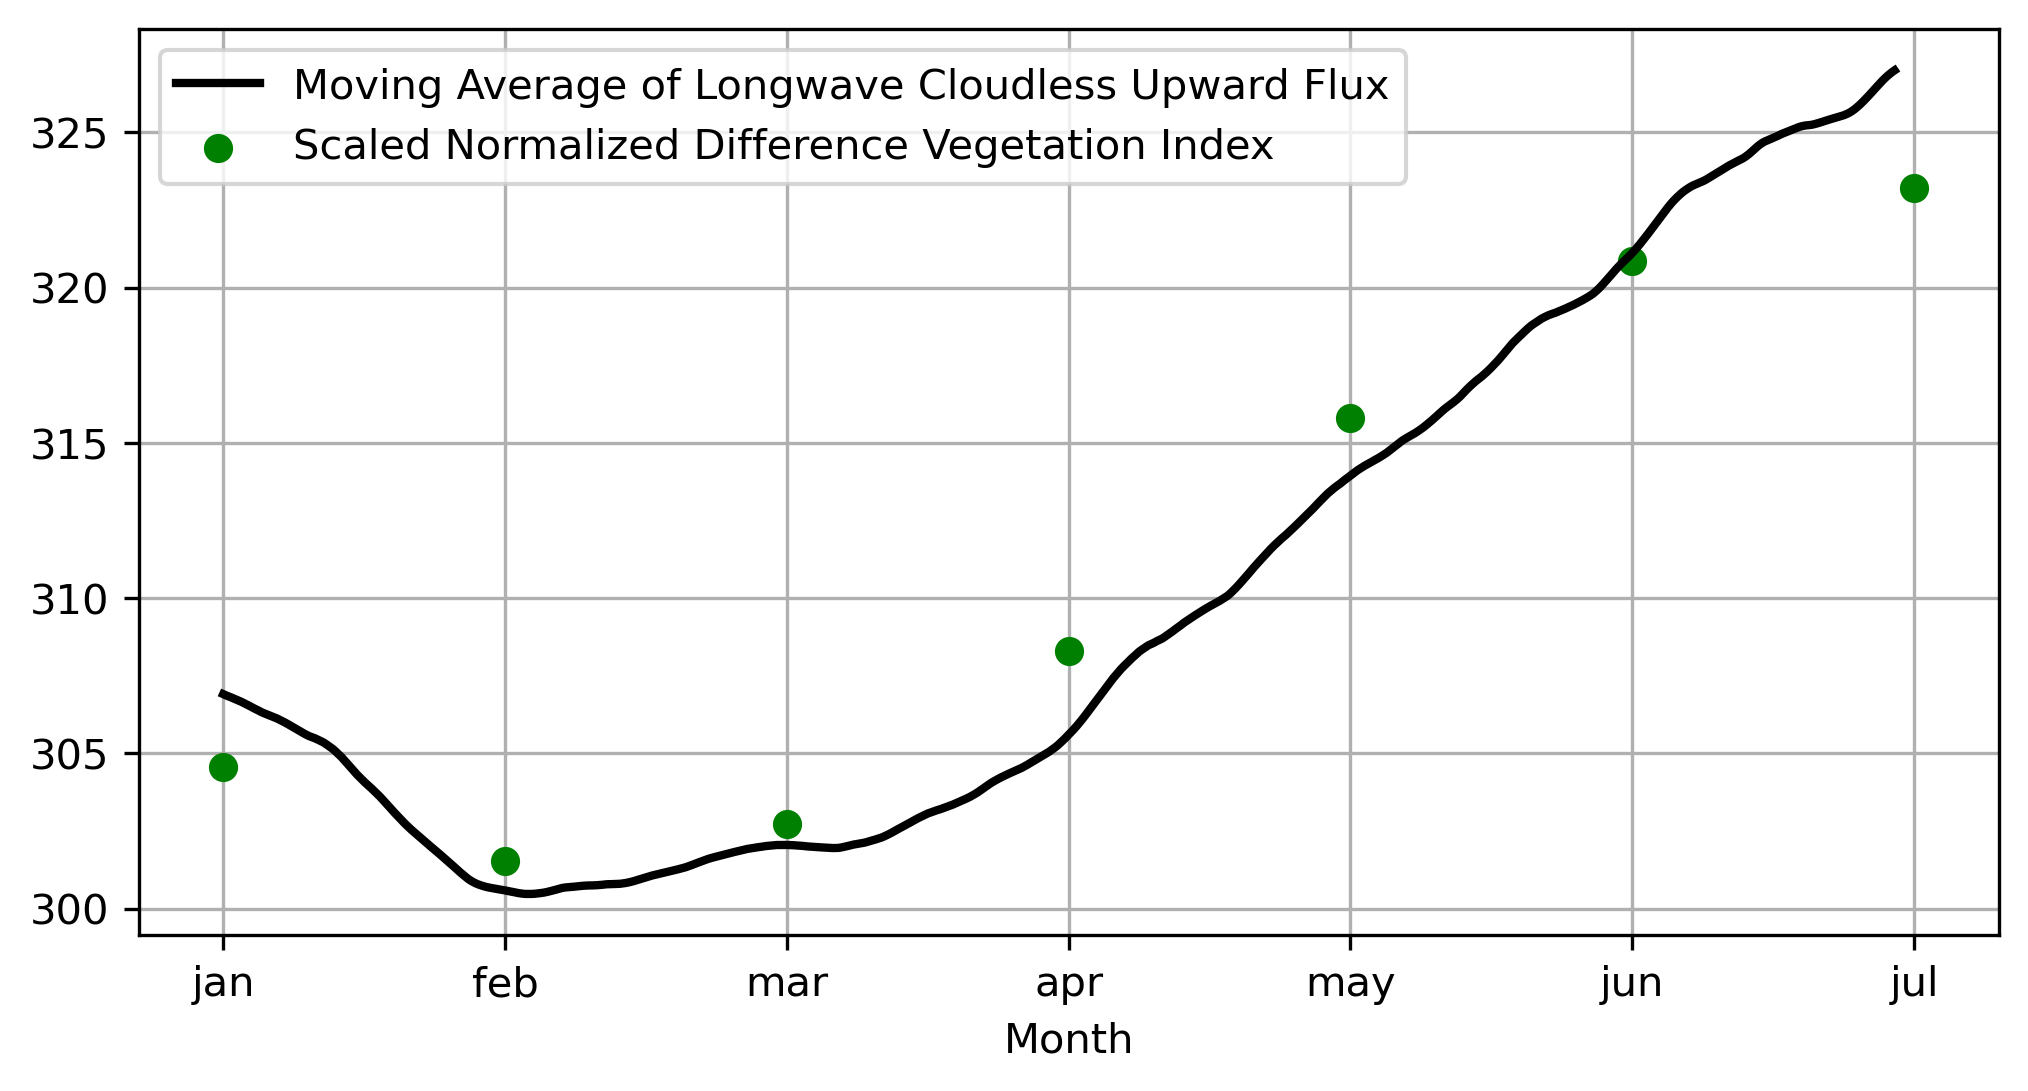

In [10]:
e_annualArrayFULC = []
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data1.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data2.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data3.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data4.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data5.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data6.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data7.FULC)

x = np.arange(0, 2520, 360)
z = [350.35324, 326.22912, 335.76347, 380.31974, 440.48307, 480.82224, 499.70307]
zMean = sum(z)/len(z)
y = []
for i in z:
    y.append((i-zMean)/8+311)

plt.figure(figsize=(8,4))
plt.xlabel('Month')
plt.grid(True, zorder=2.5)
plt.xticks(np.arange(0, 2880, 360), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug']);
#Get moving average
FUSdf = pd.DataFrame(e_annualArrayFULC)
movingMean = FUSdf.rolling(384).mean()
movingMean = movingMean.shift(-192)
shiftedmm = movingMean.shift(-192)
plt.scatter(x, y, c='green', zorder=3.5, label='Scaled Normalized Difference Vegetation Index')
plt.plot(shiftedmm, c='black', linewidth=2, zorder=3.5, label='Moving Average of Longwave Cloudless Upward Flux');
plt.legend();
plt.savefig('C:/Users/cenwe/Downloads/savedGraph.png', dpi=300, bbox_inches = 'tight')

---
### Ocean Flux

FUS

FUL

---
### Land Flux

FUS

FUL

## Fourier Power Spectrum Analysis

In [11]:
#### Reset
def reset(fftInput):
    fftOutput = np.array(fftInput) #Reset to default & convert list to numpy arrays
    return fftOutput

#### Scenario 1: Unevenly spaced time series
def scenario1(fftInput, chance):
    for i in range(len(fftInput)):
        if random.random() < chance:
            fftInput[i] = fftInput[i-1]
    return fftInput

#### Scenario 2: Few time series samples
def scenario2(fftInput, dailydp):
    fftInput = np.array(annualArrayFUS)
    counter = 0
    for i in range(len(fftInput)):
        if counter < 12 / dailydp:
            fftInput[i] = fftInput[i-1]
            counter = counter + 1
        else:
            counter = 0
    return fftInput

#### Scenario 3: Random fluctuations
def scenario3(fftInput, chance, magnitude):
    fluctuation_chance = chance
    fluctuation_magnitude = magnitude
    randomNum = random.random()
    for i in range(len(fftInput)):
        if randomNum < fluctuation_chance/2:
            fftInput[i] = fftInput[i] + random.random()*fluctuation_magnitude
        elif randomNum > 1 - fluctuation_chance/2:
            fftInput[i] = fftInput[i] - random.random()*fluctuation_magnitude
    return fftInput

#### Scenario 4: Sections averaged for exposure time
def scenario4(fftInput, length):
    tempMean = 0
    counter = 0

    for i in range(len(fftInput)):
        counter += 1
        if counter >= length or i == len(fftInput)-1:
            for j in range(int(counter)):
                tempMean = tempMean + fftInput[i - j]
            tempMean = tempMean / counter
            
            for x in range(int(counter)):
                fftInput[i - x] = tempMean

            tempMean = 0
            counter -= length
            
    return fftInput

#### Get graph parameters
def findFourier(fftInput):
    fourierTransform = np.fft.fft(fftInput)
    fourierTransform = fourierTransform[0:int(len(fftInput)/2)]
    powerSpectrum = fourierTransform
    frequency = np.arange(0, len(fftInput)/2)
    return powerSpectrum, frequency

#### Fourier transform graph

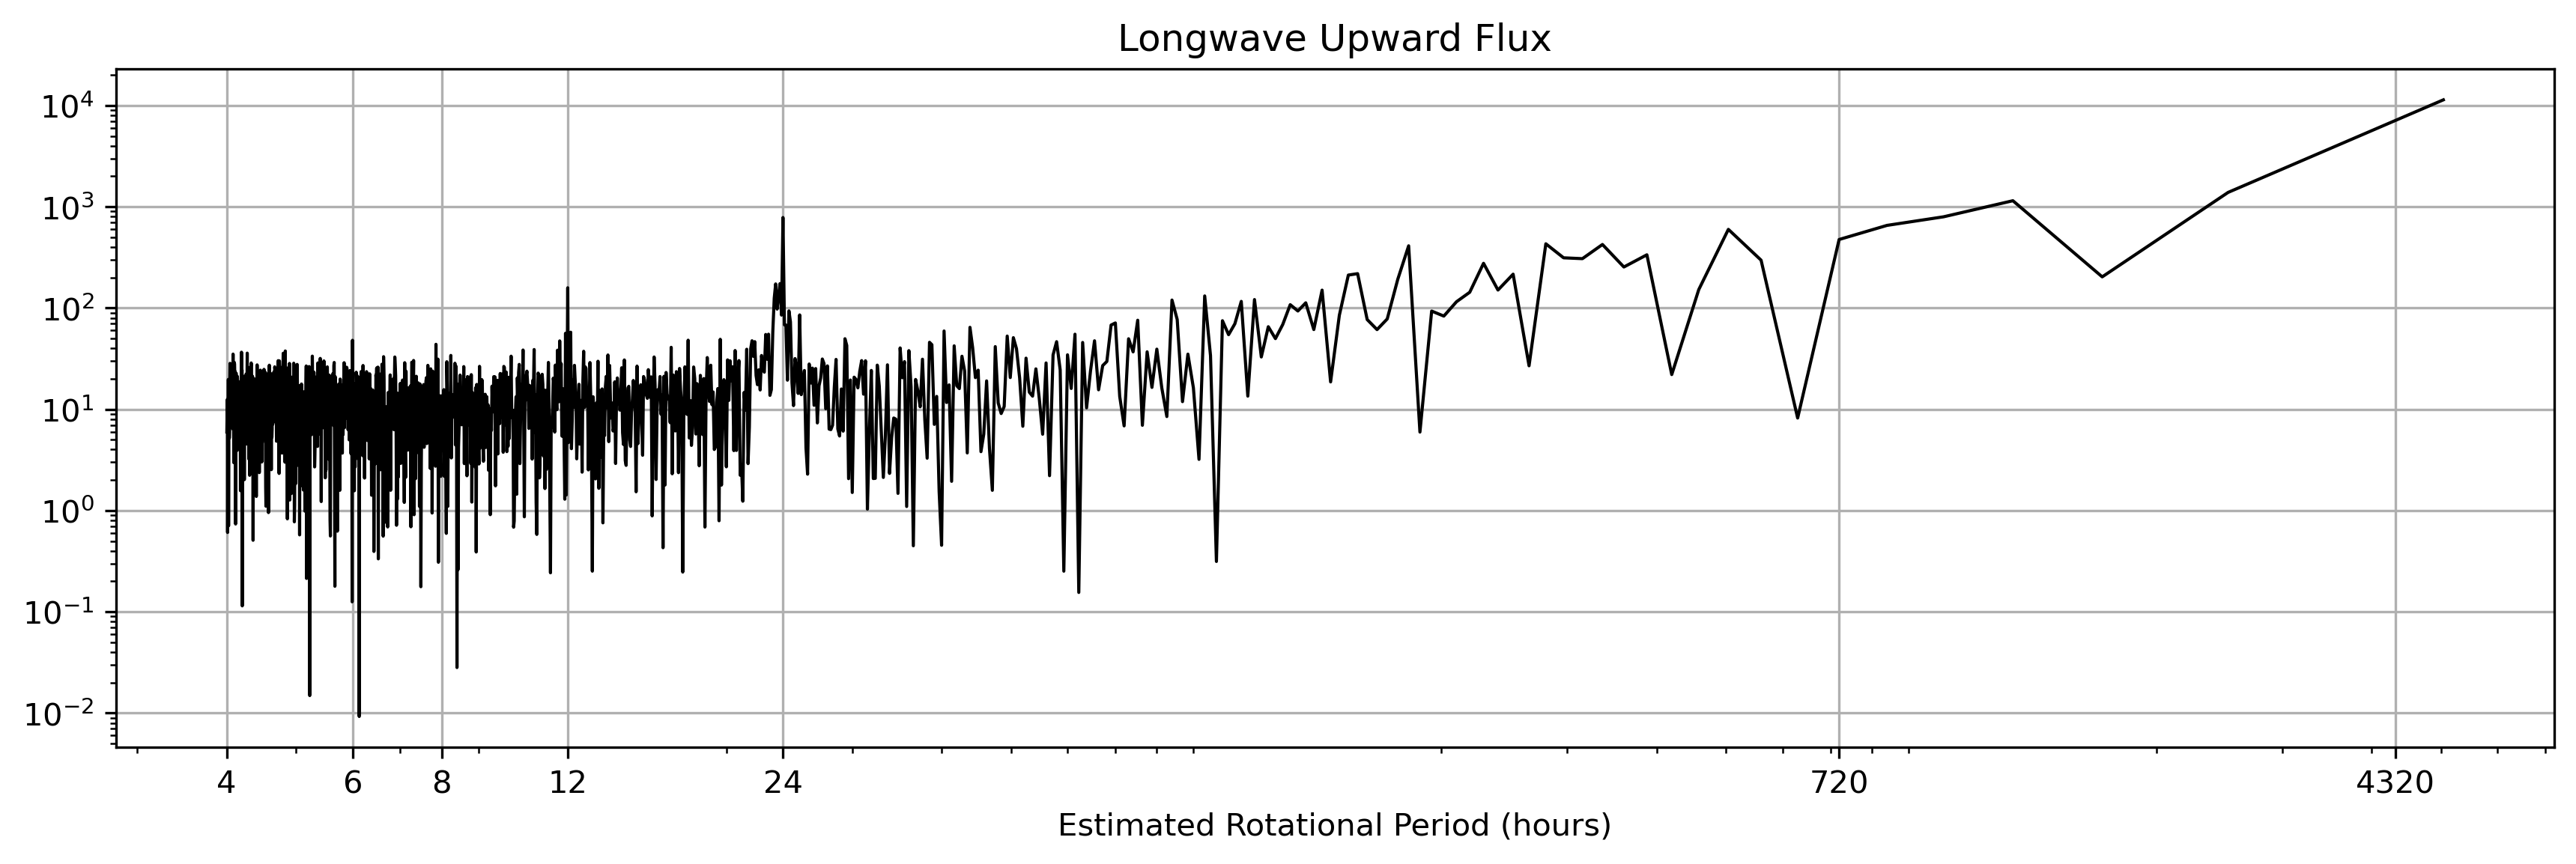

In [12]:
fftInput = reset(e_annualArrayFUL)
samplingInterval = 2 #Sampling interval(hr)
fftInput = scenario4(fftInput, samplingInterval/2)
powerSpectrum, frequency = findFourier(fftInput)

for i in range(len(powerSpectrum)):
    if abs(float(powerSpectrum[i].real)) < 10e-04:
        powerSpectrum[i] = powerSpectrum[i-1]

start = 1
end = 2520
dpInterval = 2

fig, ax1 = plt.subplots(figsize=(14,4))
ax1.plot(1/frequency[start:end]*len(fftInput)*dpInterval, 
         abs(powerSpectrum.real)[start:end], c='black', linewidth=1)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.grid(True)
ax1.set_xticks([4, 6, 8, 12, 24, 720, 4320])
ax1.get_xaxis().set_major_formatter(ScalarFormatter())
ax1.set_title('Longwave Upward Flux');
ax1.set_xlabel('Estimated Rotational Period (hours)');

5
41167182.61923185
200


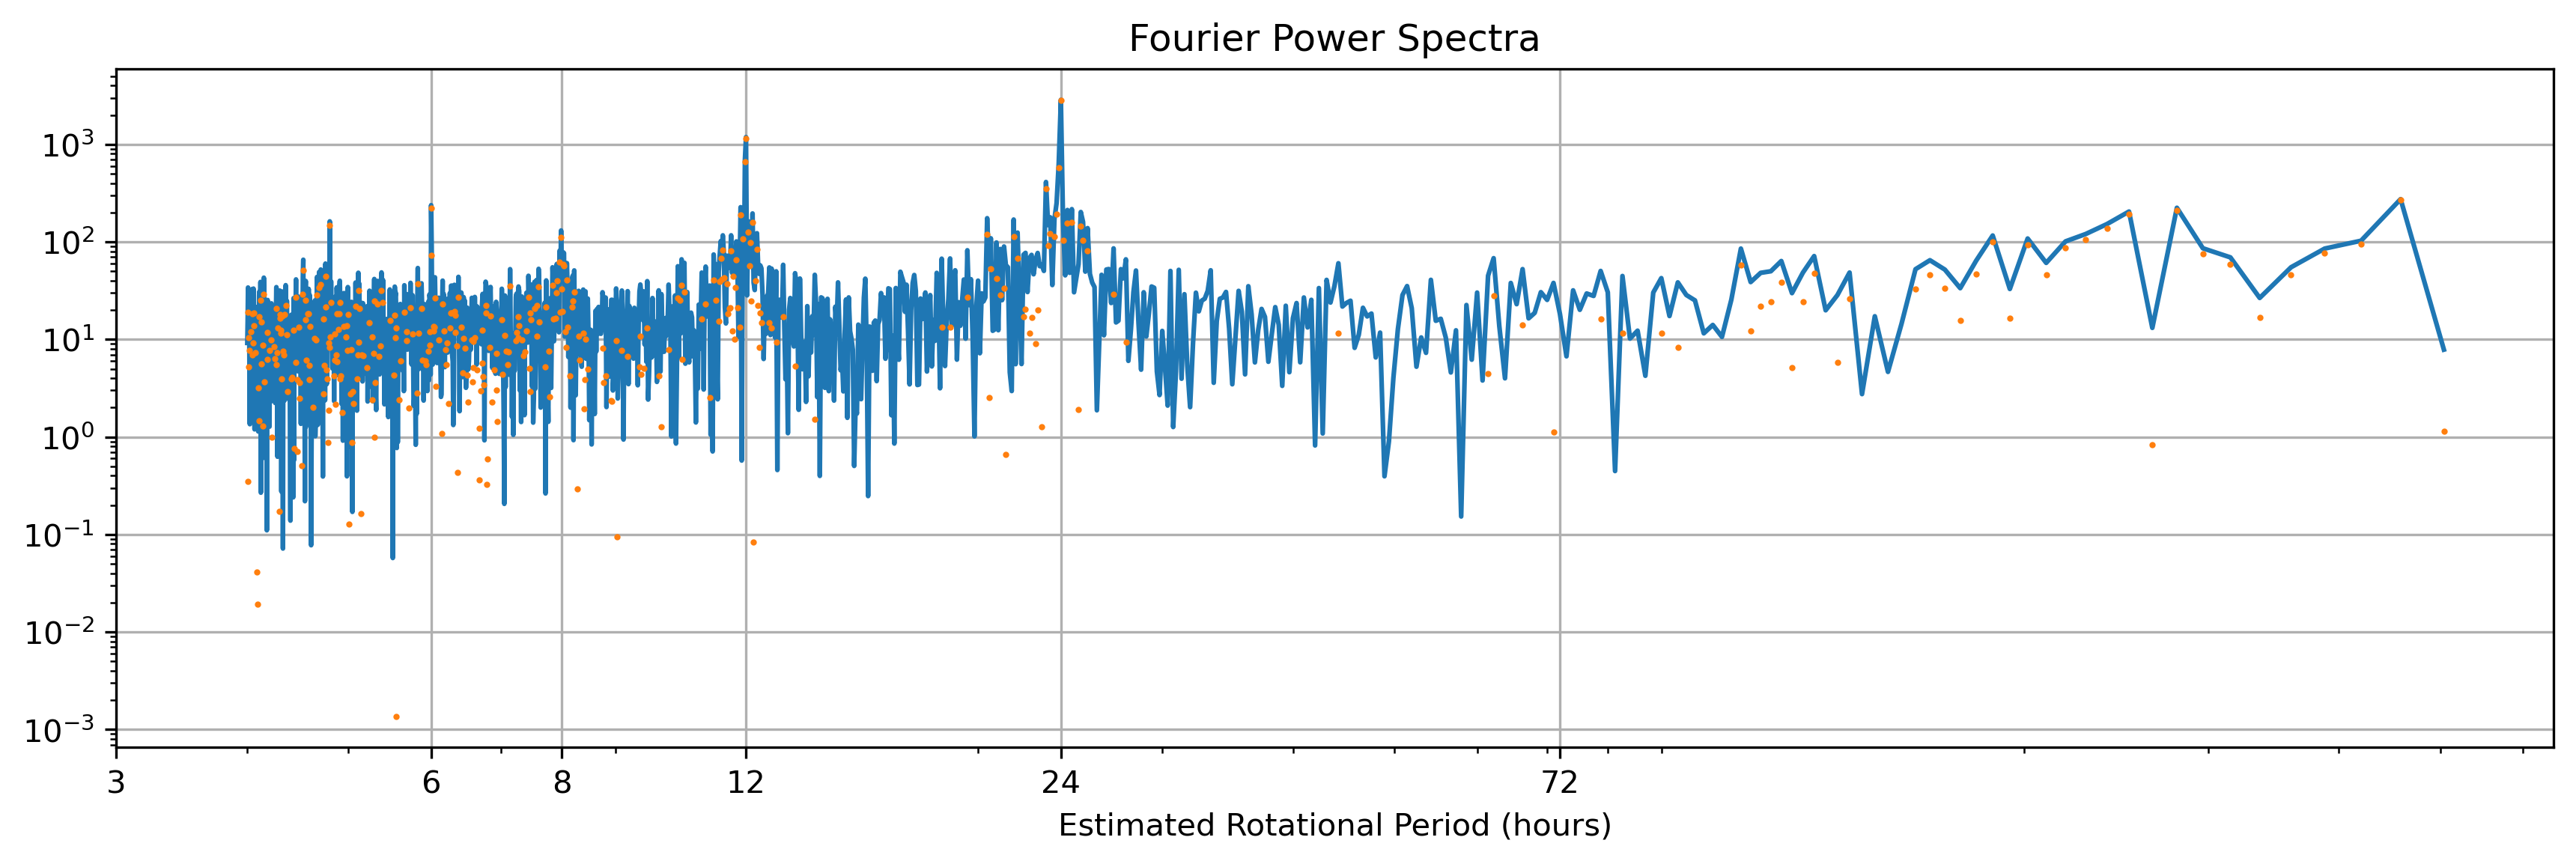

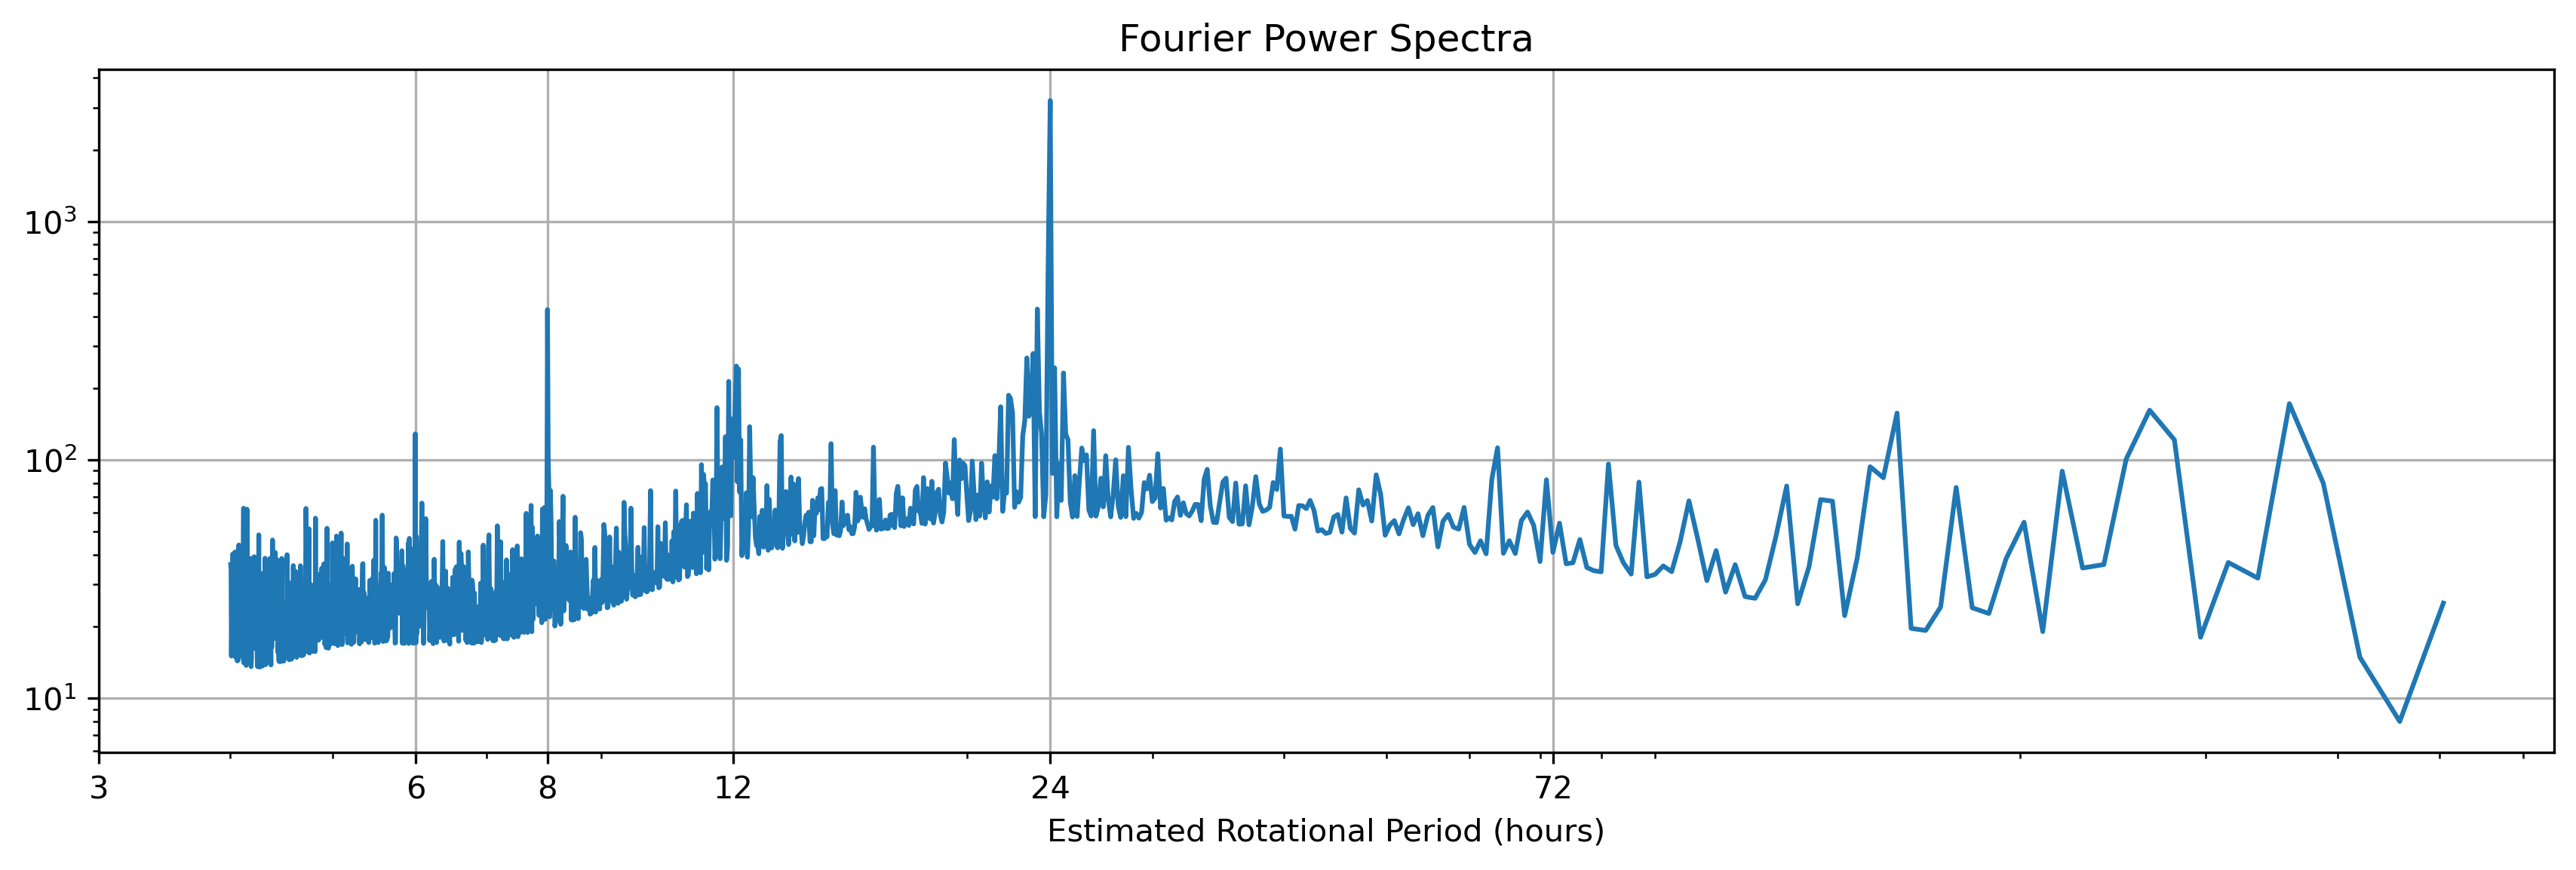

In [13]:
fftInput = reset(e_annualArrayFUS)
samplingInterval = 2 #Sampling interval(hr)
fftInput = scenario4(fftInput, samplingInterval/2)
powerSpectrum, frequency = findFourier(fftInput)

for i in range(len(powerSpectrum)):
    if abs(float(powerSpectrum[i].real)) < 10e-04:
        powerSpectrum[i] = powerSpectrum[i-1]

errorArray = []
for i in range(50):
    detrendSpectrum = detrend(powerSpectrum, i+5)
    errorArray.append(sum((abs(powerSpectrum)-detrendSpectrum.real)**2))
minIndex = errorArray.index(min(errorArray))
detrendSpectrum = detrend(abs(powerSpectrum.real), minIndex+5)
print(minIndex+5)

start = 10
end = 2520
dpInterval = 2

fig, ax1 = plt.subplots(figsize=(14,4))
ax1.plot(1/frequency[start:end]*len(fftInput)*dpInterval, abs(powerSpectrum.real)[start:end])
ax1.plot(1/frequency[start:end]*len(fftInput)*dpInterval, detrendSpectrum.real[start:end], 'o', markersize=1)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.grid(True)
ax1.set_xticks([3, 6, 8, 12, 24, 72])
ax1.get_xaxis().set_major_formatter(ScalarFormatter())
ax1.set_title('Fourier Power Spectra');
ax1.set_xlabel('Estimated Rotational Period (hours)');

detrendedData = abs(powerSpectrum)[start:end]-detrendSpectrum.real[start:end]
fig, ax2 = plt.subplots(figsize=(14,4))
ax2.plot(1/frequency[start:end]*len(fftInput)*dpInterval, detrendedData)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.grid(True)
ax2.set_xticks([3, 6, 8, 12, 24, 72])
ax2.get_xaxis().set_major_formatter(ScalarFormatter())
ax2.set_title('Fourier Power Spectra');
ax2.set_xlabel('Estimated Rotational Period (hours)');
print(sum((abs(powerSpectrum)-detrendSpectrum.real)**2))
print(detrendedData.tolist().index(max(detrendedData)))

[24, 24, 24, 24, 24, 24, 34, 48, 72, 120, 265, 280, 315, 168, 120, 97, 81, 72, 92, 120, 168, 280, 280, 280]


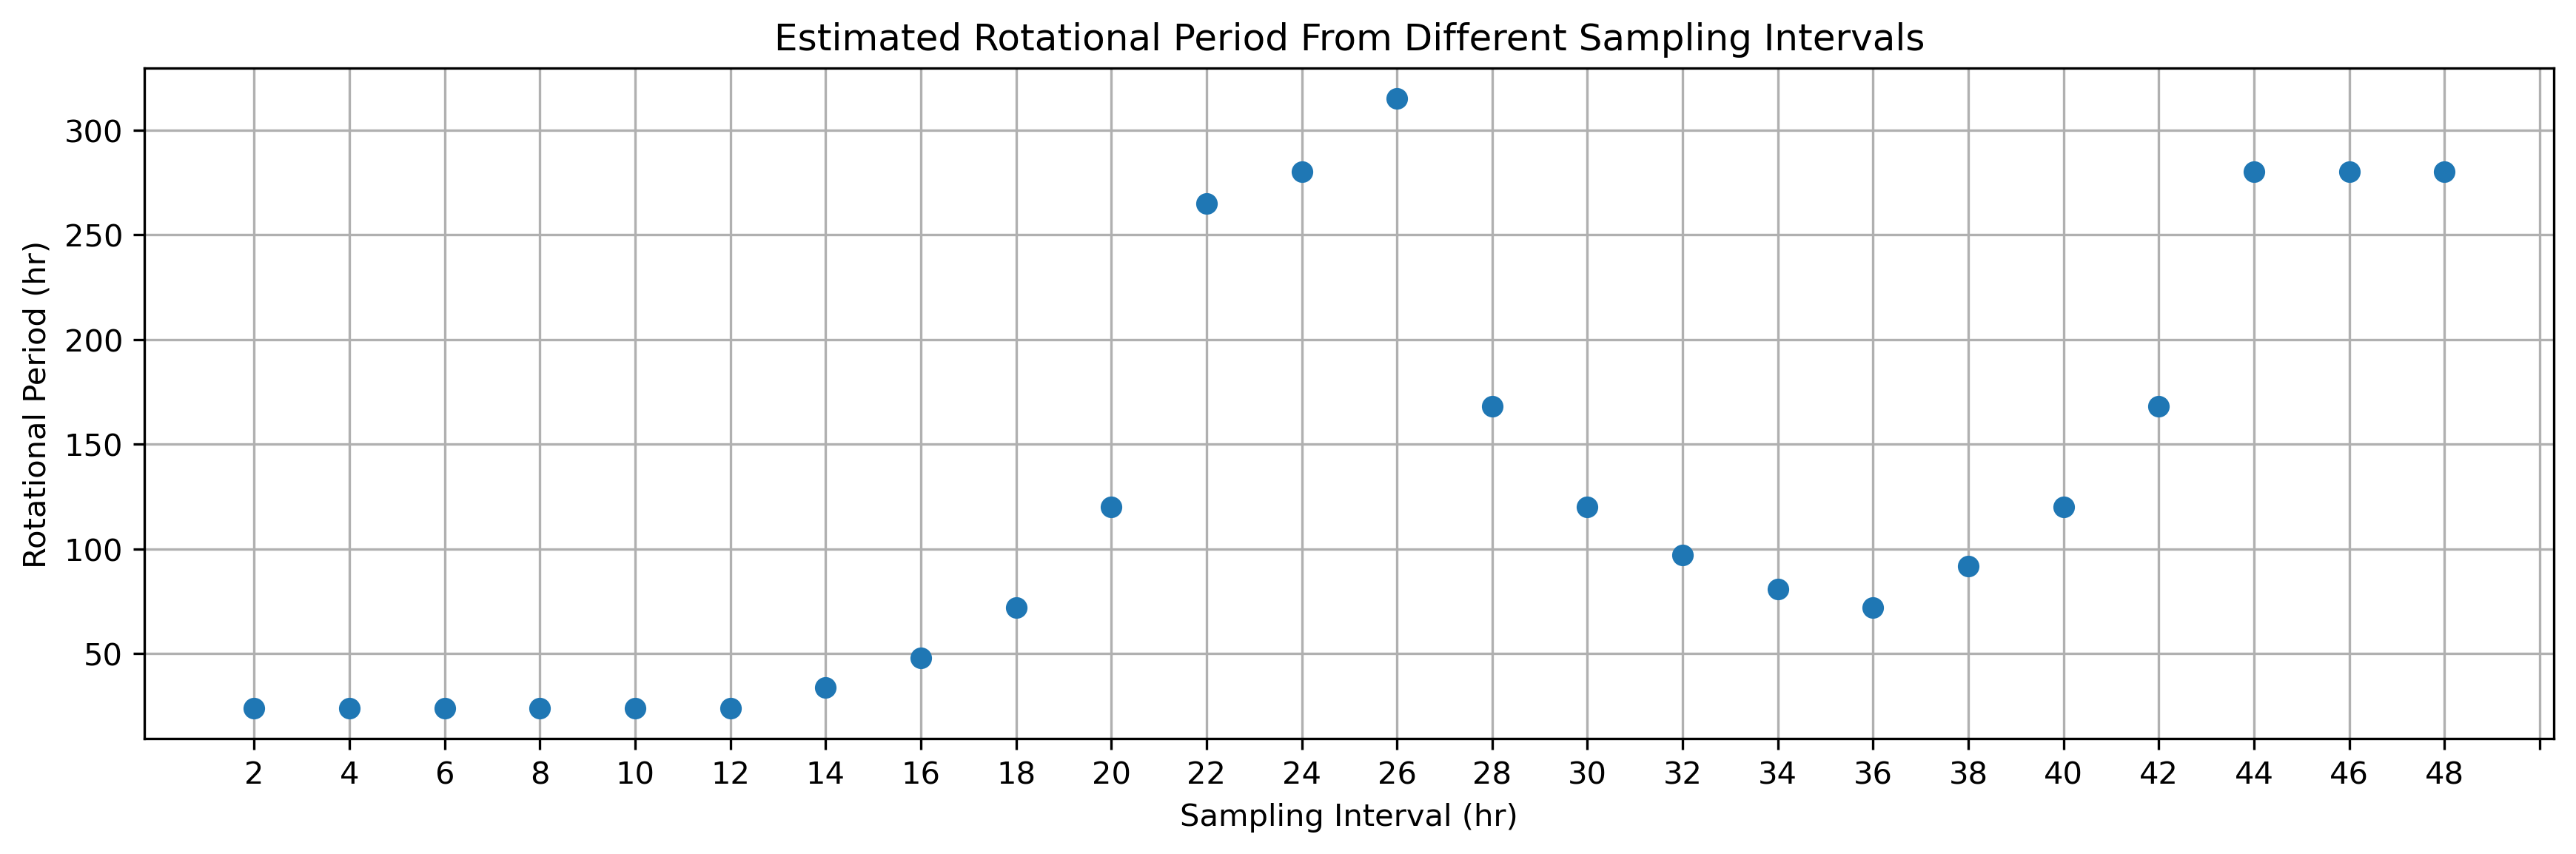

In [14]:
#No detrend
start = 10
end = 2520
peakArray = []
npdataset = reset(e_annualArrayFUS[:])

for x in range(2, 50, 2):
    fftInput = list(npdataset)
    fftInput = scenario4(fftInput, x/2)
    powerSpectrum, frequency = findFourier(fftInput)
        
    psList = abs(powerSpectrum[start:end]).tolist()
    estimated_days = psList.index(max(psList))
    peakArray.append(int(round(1/(estimated_days+start)*2520*2)))

plt.figure(figsize=(14,4))
plt.plot(peakArray, 'o')
plt.title('Estimated Rotational Period From Different Sampling Intervals')
plt.ylabel('Rotational Period (hr)')
plt.xlabel('Sampling Interval (hr)')
plt.yscale('linear')
plt.grid(True)
plt.xticks(np.arange(0, 25, 1), np.arange(2, 50, 2));
print(peakArray)

[24, 24, 24, 24, 24, 24, 24, 24, 72, 120, 360, 360, 315, 168, 120, 97, 21, 72, 65, 120, 168, 360, 360, 360]


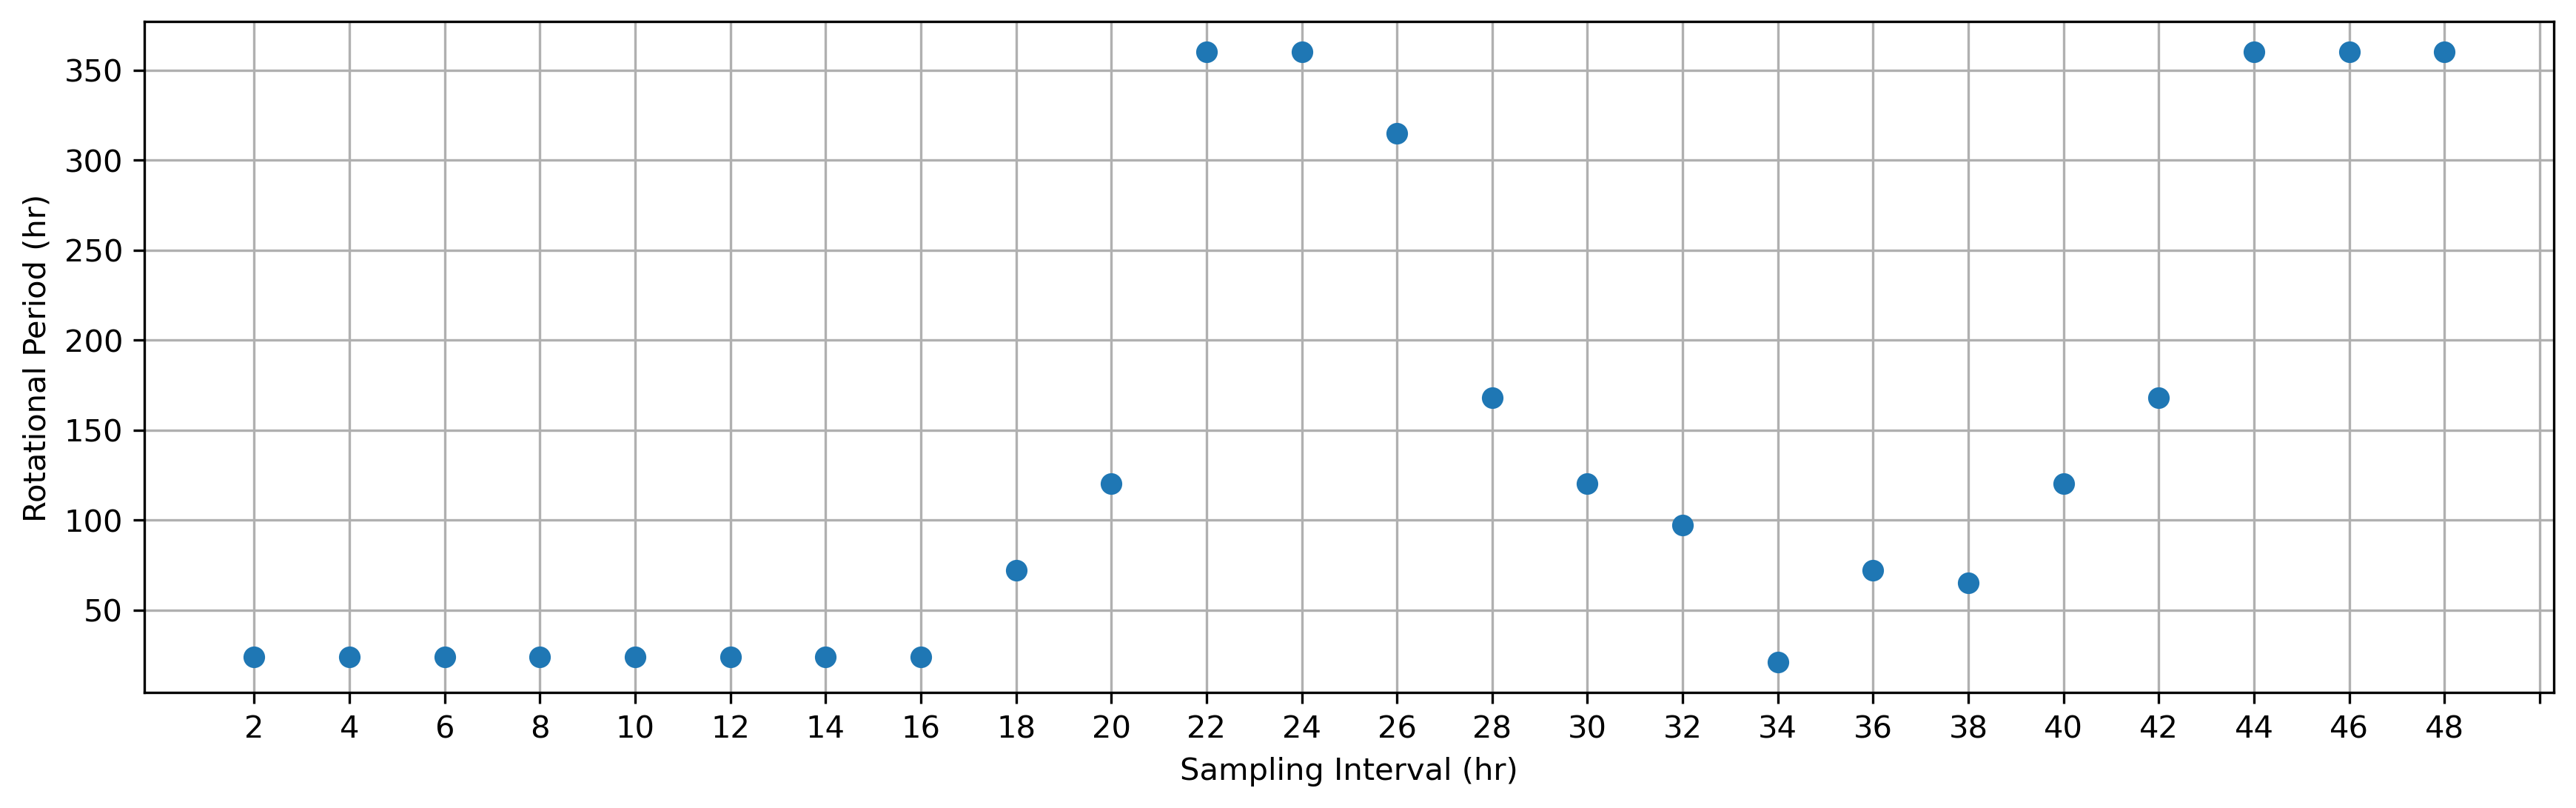

In [15]:
start = 10
end = 2520
dpInterval = 2
peakArray = []
npdataset = reset(e_annualArrayFUS[:])

for x in range(2, 50, 2):
    samplingInterval = x #Sampling interval(hr)
    fftInput = list(npdataset)
    fftInput = scenario4(fftInput, samplingInterval/2)
    powerSpectrum, frequency = findFourier(fftInput)
    
    for i in range(len(powerSpectrum)):
        if abs(float(powerSpectrum[i].real)) < 10e-04:
            powerSpectrum[i] = powerSpectrum[i-1]
    
    detrendSpectrum = detrend(abs(powerSpectrum.real), 7)
    detrendedData = abs(powerSpectrum)[start:end]-detrendSpectrum.real[start:end]
    estimated_days = detrendedData.tolist().index(max(detrendedData))
    peakArray.append(int(round(1/(estimated_days+start)*2520*2)))

plt.figure(figsize=(14,4))
plt.plot(peakArray, 'o')
plt.ylabel('Rotational Period (hr)')
plt.xlabel('Sampling Interval (hr)')
plt.grid(True)
plt.xticks(np.arange(0, 25, 1), np.arange(2, 50, 2));
print(peakArray)

In [16]:
def getPeak(fftInput, start, sampleRange, interval, period):
    errorArray = []
    tempMean = 0
    fftOutput = reset(fftInput)
    xRange = 10000 #Number of random samples
    correctDays = 0
    psList = []
    fftOutput = scenario4(fftOutput, interval)
    tempfft = fftOutput
    correctEstimate = 0
    for x in range(xRange):
        randomNum = random.random()*(int(len(fftOutput)/sampleRange)-1)
        fftOutput = tempfft
        powerSpectrum, frequency = findFourier(fftOutput[int(randomNum*sampleRange):int(randomNum*sampleRange + sampleRange)])
        
        psList = abs(powerSpectrum).tolist()
        estimated_days = psList.index(max(psList[start:]))
        errorArray.append(estimated_days)
        if estimated_days >= int(sampleRange/period*2)-1 and estimated_days <= int(sampleRange/period*2)+1:
            correctDays += 1
    
    return errorArray, correctDays

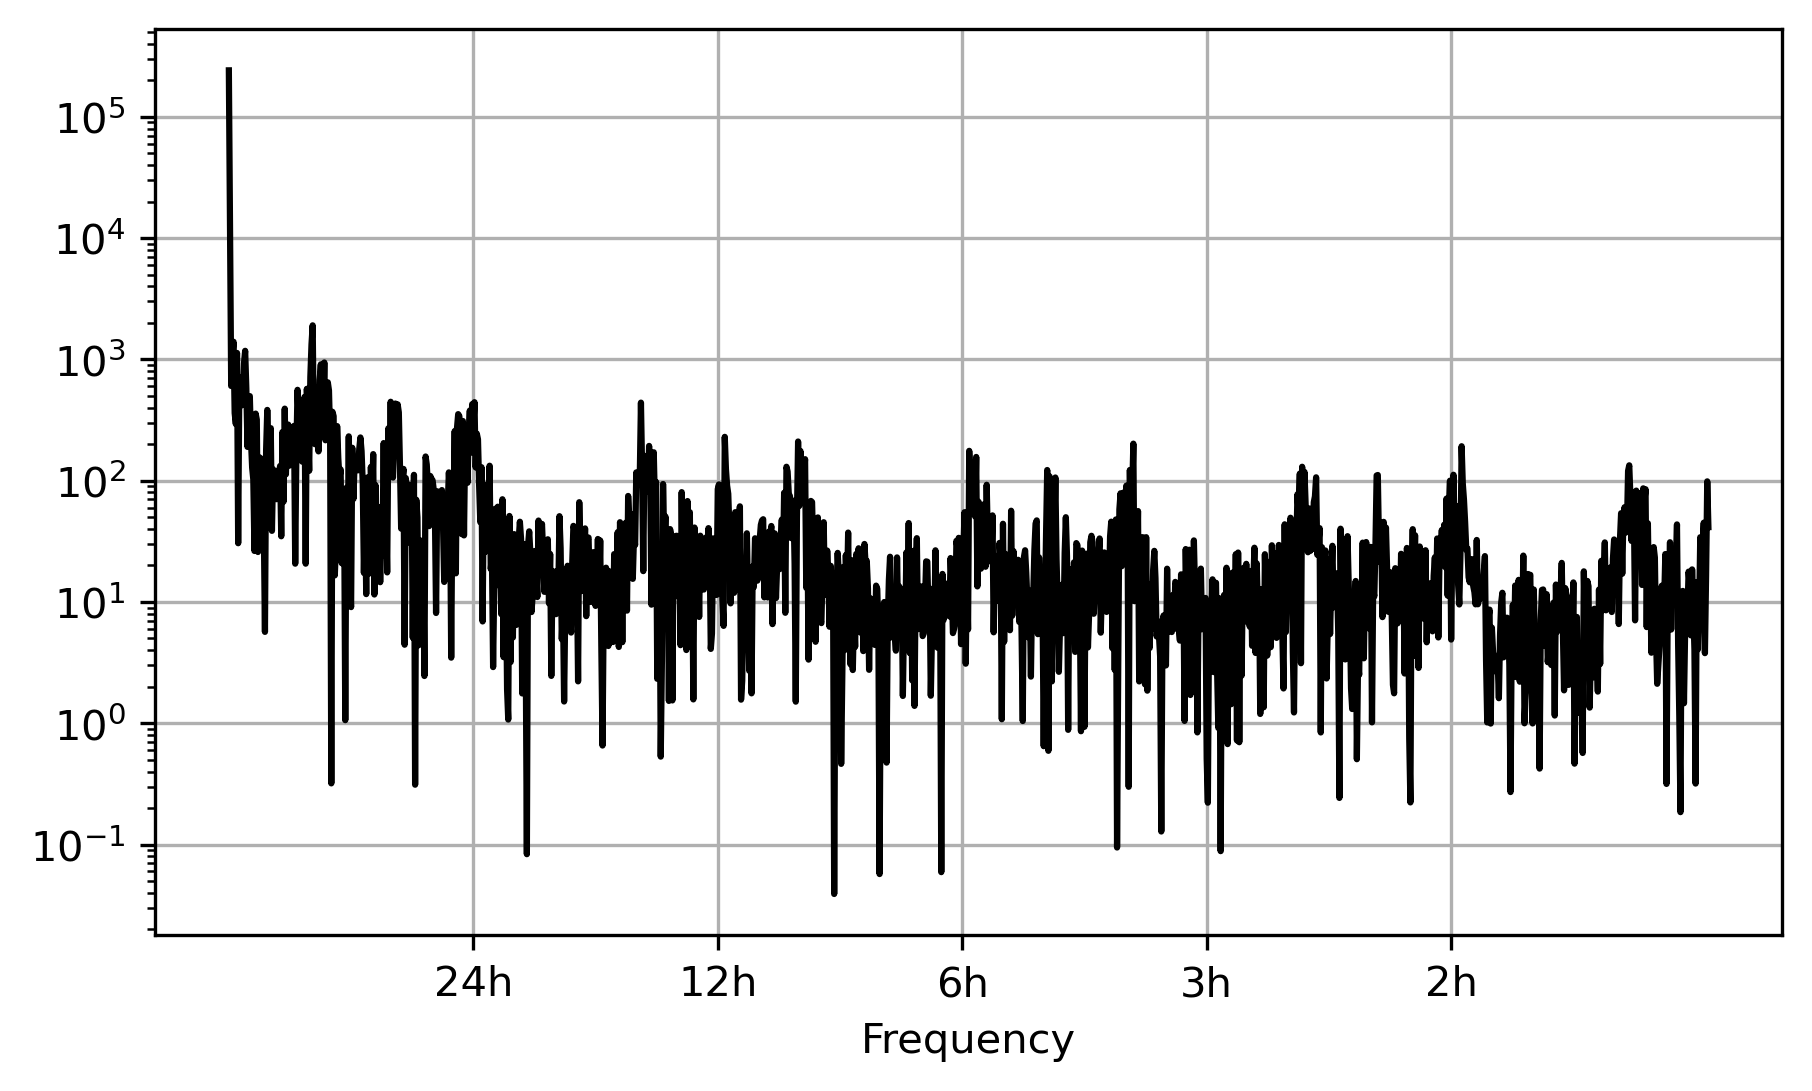

In [17]:
fftInput = reset(e_annualArrayFUS3)
samplingInterval = 18 #Sampling interval(hr)
fftInput = scenario4(fftInput, samplingInterval/2)
powerSpectrum, frequency = findFourier(fftInput)

for i in range(len(powerSpectrum)):
    if abs(float(powerSpectrum[i].real)) < 10e-04:
        powerSpectrum[i] = powerSpectrum[i-1]

start = 0
end = 2520
dpInterval = 2

plt.figure(figsize=(7,4))
plt.plot(frequency[start:end], abs(powerSpectrum.real)[start:end], c='black')
plt.yscale('log')
plt.grid(True)
plt.xticks([210, 420, 630, 840, 1050], ['24h', '12h', '6h', '3h', '2h'])
plt.xlabel('Frequency');
plt.savefig('C:/Users/cenwe/Downloads/savedGraph.png', dpi=300, bbox_inches = 'tight')

0.29672


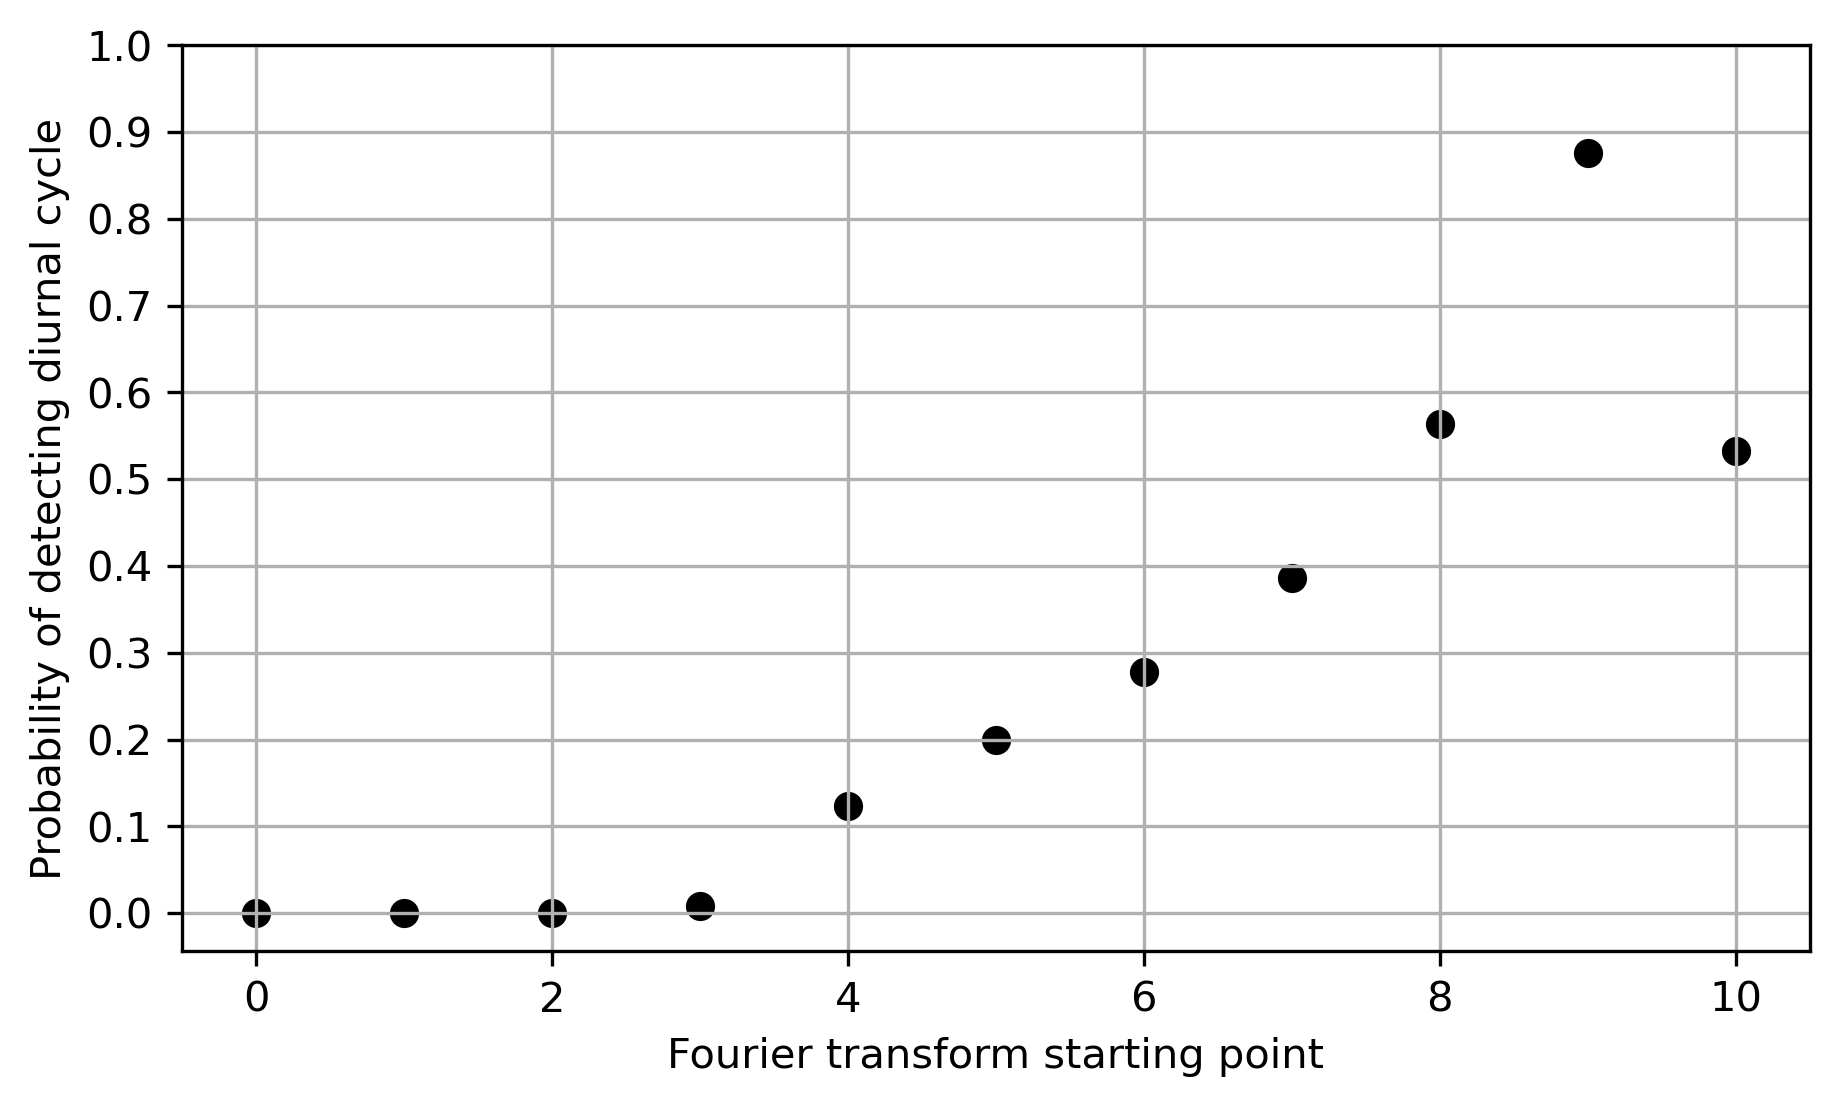

In [18]:
correctArray = []

inputData = e_annualArrayFUS3
samplingInterval = 66 #Sampling interval(hr)
sampleRange = 360
correctPeriod = 72

for x in range(int(sampleRange/correctPeriod*2)+1):
    #(graph, start, sampleRange, interval, period)
    errorArray, correctDays = getPeak(inputData, x, sampleRange, samplingInterval/2, correctPeriod)
    correctChance = correctDays/10000
    correctArray.append(correctChance)
print(sum(correctArray[1:]) / len(correctArray[1:]))

plt.figure(figsize=(7,4))
plt.scatter(np.arange(0, int(sampleRange/correctPeriod*2)+1, 1), correctArray, c='black')
plt.grid(True)
plt.ylabel('Probability of detecting diurnal cycle');
plt.xlabel('Fourier transform starting point');
plt.yticks(np.arange(0, 1.1, 0.1));

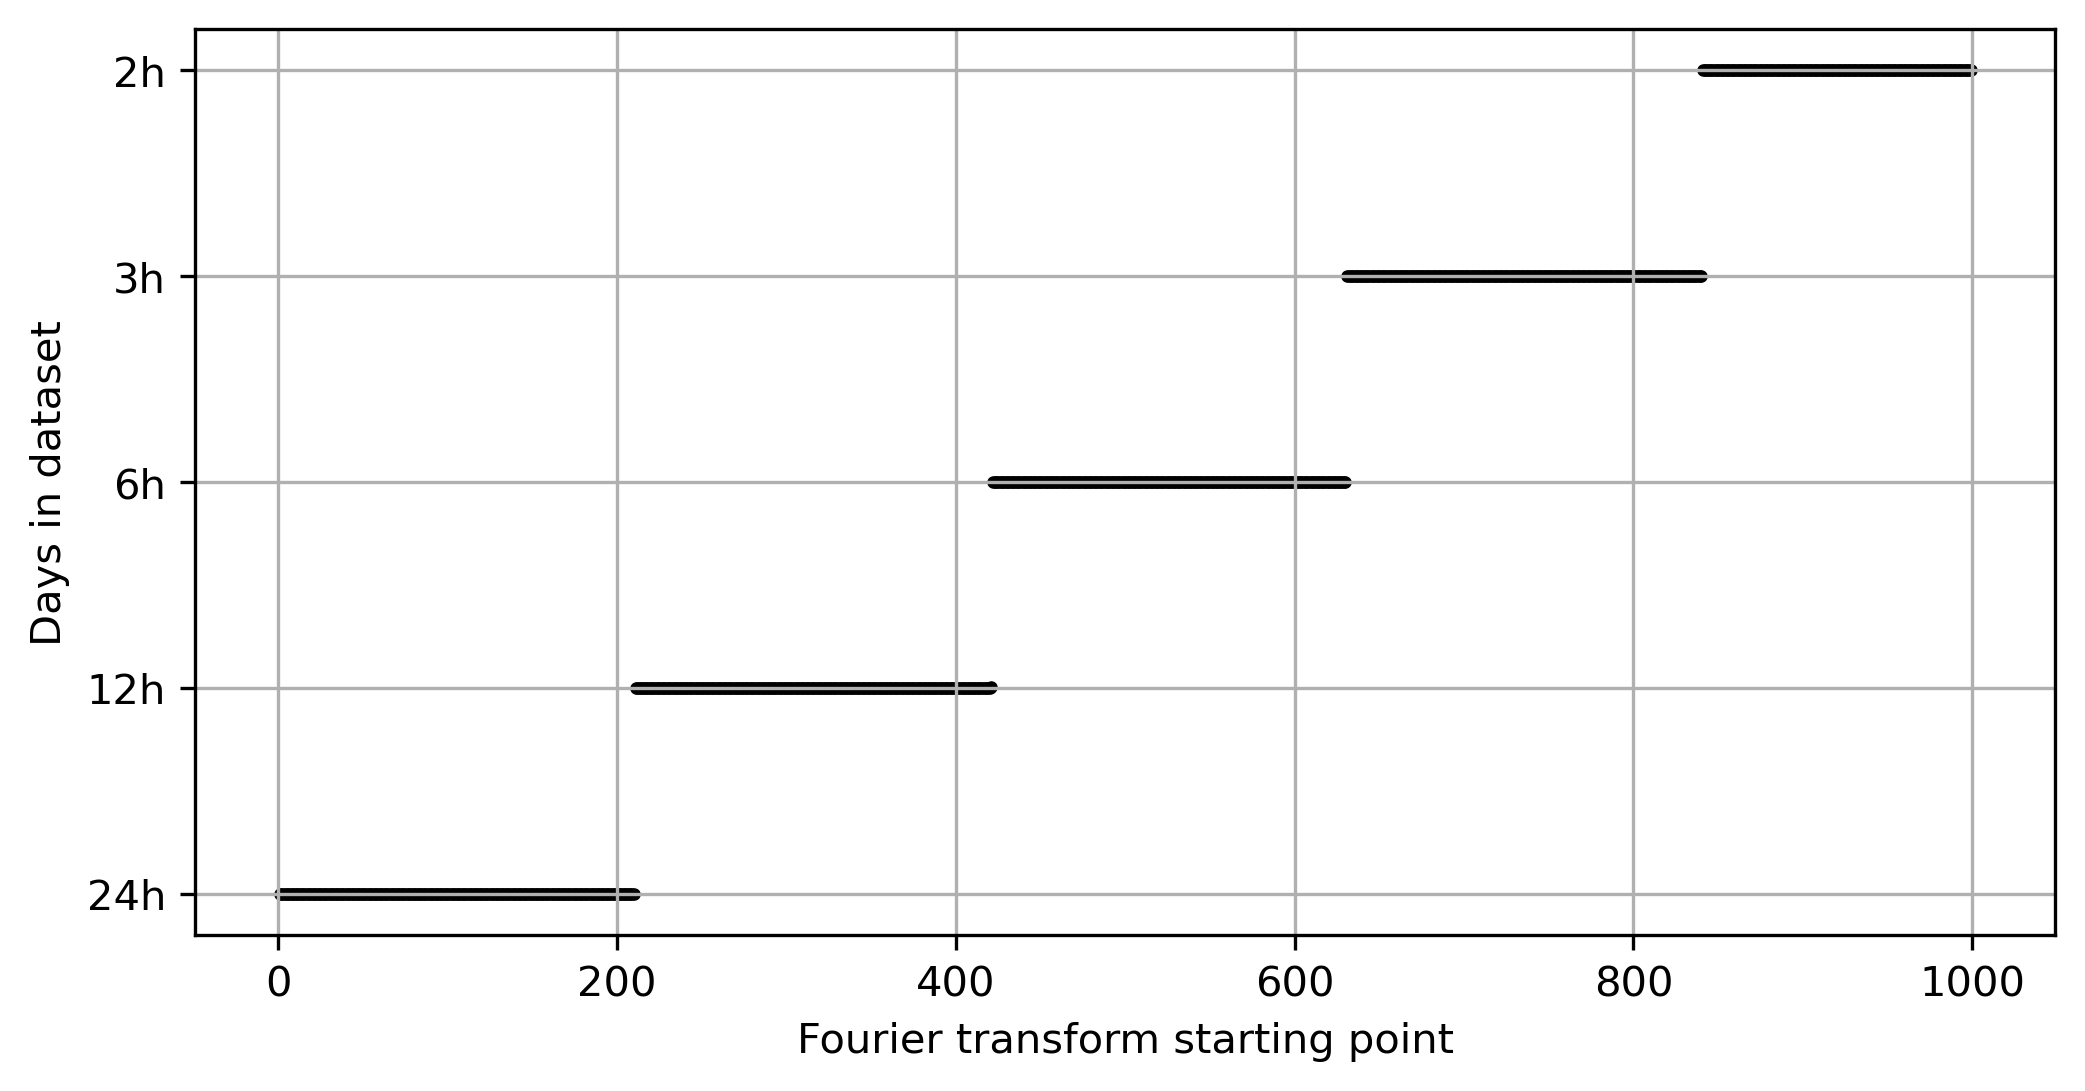

In [19]:
inputData = e_annualArrayFUS[:]
plt.figure(figsize=(8,4))

for i in range(2, 4, 2):
    peakArray = []
    outputData = scenario4(inputData[:], i/2)
    powerSpectrum, frequency = findFourier(outputData)
    for x in range(1, 1000, 1):
        days_in_dataset = abs(powerSpectrum).tolist().index(max(abs(powerSpectrum[x:])))
        peakArray.append(days_in_dataset)
    plt.scatter(np.arange(1, 1000, 1), peakArray, s=4, alpha=1, color='black')

plt.grid(True)
plt.ylabel('Days in dataset');
plt.xlabel('Fourier transform starting point');
plt.yticks([210, 420, 630, 840, 1050], ['24h', '12h', '6h', '3h', '2h']);

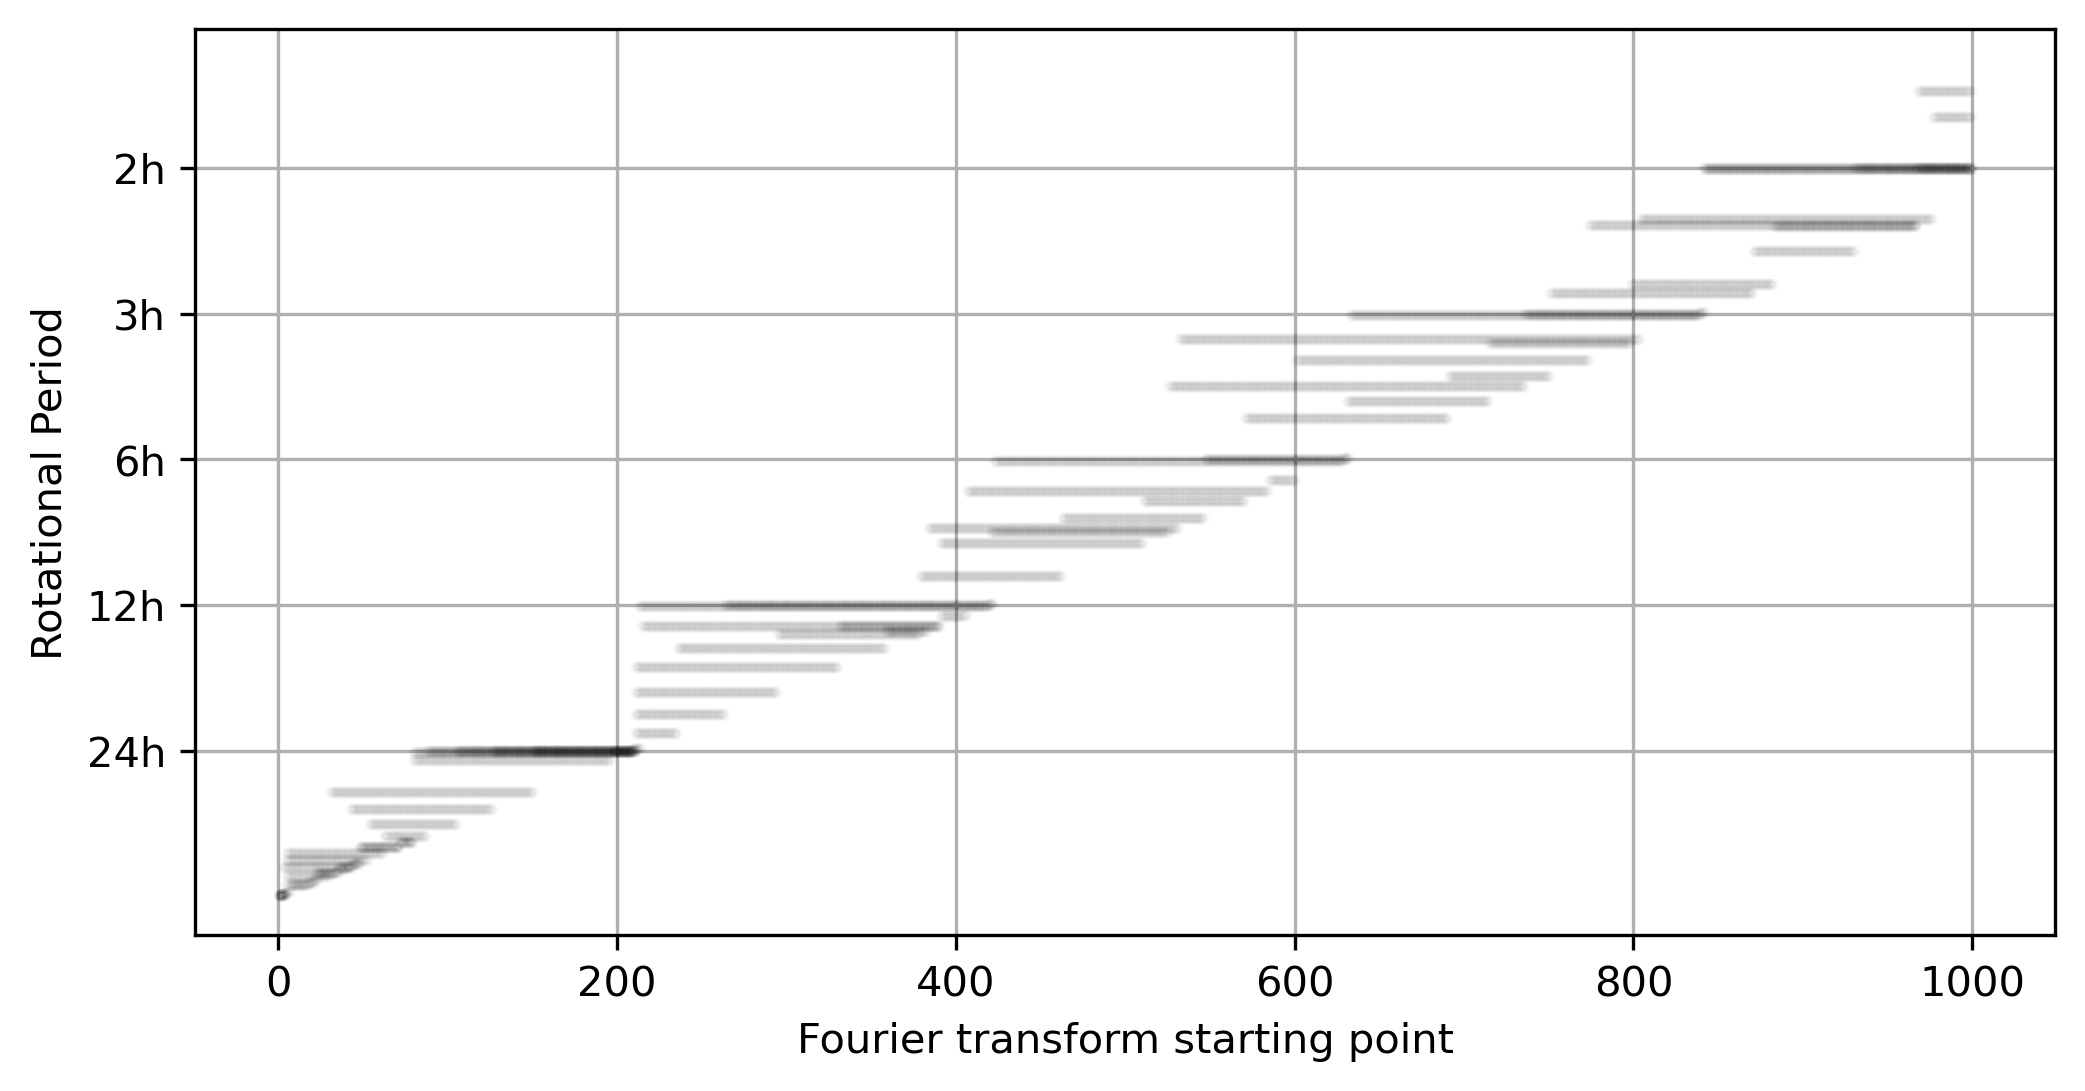

In [20]:
inputData = e_annualArrayFUS[:]
plt.figure(figsize=(8,4))

for i in range(24, 36, 2):
    peakArray = []
    outputData = scenario4(inputData[:], i/2)
    powerSpectrum, frequency = findFourier(outputData)
    for x in range(1, 1000, 1):
        days_in_dataset = abs(powerSpectrum).tolist().index(max(abs(powerSpectrum[x:])))
        peakArray.append(days_in_dataset)
    plt.scatter(np.arange(1, 1000, 1), peakArray, s=4, alpha=0.02, color='black', zorder=3.5)

plt.grid(True, zorder=2.5)
plt.ylabel('Rotational Period');
plt.xlabel('Fourier transform starting point');
plt.yticks(np.arange(0, 1300, 50));
plt.yticks([210, 420, 630, 840, 1050], ['24h', '12h', '6h', '3h', '2h']);
plt.savefig('C:/Users/cenwe/Downloads/savedGraph.png', dpi=300, bbox_inches = 'tight')